# Análise Exploratória de Dados

- Conjunto de dados: `orange_quality` (Qualidade de Laranjas)
- Cientistas de Dados - Equipe Pandalytics:
  - Giulia Cunha
  - Augusto Ferreira
  - Isabela Buzzo


  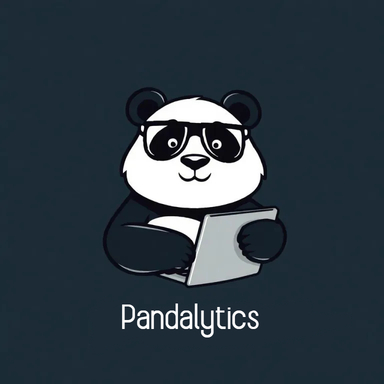

## Preparação
- Carregamento de bibliotecas.


In [ ]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Markdown
import itertools

sns.set_theme(style = "whitegrid")

- Leitura do arquivo

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/orange_quality.csv")

- Tradução das Colunas para PT-BR

In [ ]:
# Dicionário de renomeação
colunas_traduzidas = {
    "Size (cm)": "Tamanho (cm)",
    "Weight (g)": "Peso (g)",
    "Brix (Sweetness)": "Brix (Doçura)",
    "pH (Acidity)": "pH (Acidez)",
    "Softness (1-5)": "Maciez (1-5)",
    "HarvestTime (days)": "Tempo de Colheita (dias)",
    "Ripeness (1-5)": "Maturação (1-5)",
    "Color": "Cor",
    "Variety": "Variedade",
    "Blemishes (Y/N)": "Manchas (S/N)",
    "Quality (1-5)": "Qualidade (1-5)"
}

# Aplicando a renomeação
df = df.rename(columns=colunas_traduzidas)

# Opções de display do pandas para remover notação científica e zeros à direita
pd.options.display.float_format = '{:.1f}'.format

- Informações Iniciais


In [ ]:
display(Markdown("### Primeiras Linhas"))
display(df.head())

display(Markdown("### Últimas Linhas"))
display(df.tail())

display(Markdown("### Informações das Variaveis"))
display(df.info())

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras Linhas

Tamanho (cm)  Peso (g)  Brix (Doçura)  pH (Acidez)  Maciez (1-5)  \
0           7.5       180           12.0          3.2           2.0   
1           8.2       220           10.5          3.4           3.0   
2           6.8       150           14.0          3.0           1.0   
3           9.0       250            8.5          3.8           4.0   
4           8.5       210           11.5          3.3           2.5   

   Tempo de Colheita (dias)  Maturação (1-5)           Cor     Variedade  \
0                        10              4.0        Orange      Valencia   
1                        14              4.5   Deep Orange         Navel   
2                         7              5.0  Light Orange     Cara Cara   
3                        21              3.5    Orange-Red  Blood Orange   
4                        12              5.0        Orange        Hamlin   

  Manchas (S/N)  Qualidade (1-5)  
0             N              4.0  
1             N              4.5  
2             N              5.0  
3             N              3.5  
4     Y (Minor)              4.5

### Últimas Linhas

Tamanho (cm)  Peso (g)  Brix (Doçura)  pH (Acidez)  Maciez (1-5)  \
236           8.0       194           10.9          3.6           5.0   
237           7.4       275            8.5          3.5           5.0   
238           7.5       196           15.7          3.0           3.0   
239           7.2       251            9.8          4.3           3.0   
240           7.3       282           10.5          2.9           4.0   

     Tempo de Colheita (dias)  Maturação (1-5)           Cor  \
236                        13              1.0    Orange-Red   
237                        20              5.0  Light Orange   
238                        13              3.0   Deep Orange   
239                        23              1.0  Light Orange   
240                        21              2.0    Orange-Red   

             Variedade            Manchas (S/N)  Qualidade (1-5)  
236          Tangerine                Y (Scars)              5.0  
237  Minneola (Hybrid)                        N              4.0  
238             Temple  Y (Minor Insect Damage)              5.0  
239       Moro (Blood)  Y (Minor Insect Damage)              3.0  
240              Jaffa                Y (Minor)              4.0

### Informações das Variaveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tamanho (cm)              241 non-null    float64
 1   Peso (g)                  241 non-null    int64  
 2   Brix (Doçura)             241 non-null    float64
 3   pH (Acidez)               241 non-null    float64
 4   Maciez (1-5)              241 non-null    float64
 5   Tempo de Colheita (dias)  241 non-null    int64  
 6   Maturação (1-5)           241 non-null    float64
 7   Cor                       241 non-null    object 
 8   Variedade                 241 non-null    object 
 9   Manchas (S/N)             241 non-null    object 
 10  Qualidade (1-5)           241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


None

### Quantidade de valores únicos

Tamanho (cm)                 41
Peso (g)                    131
Brix (Doçura)                82
pH (Acidez)                  44
Maciez (1-5)                  9
Tempo de Colheita (dias)     22
Maturação (1-5)               8
Cor                           5
Variedade                    24
Manchas (S/N)                12
Qualidade (1-5)               8
dtype: int64

A partir da análise inicial, podemos dizer que:
- O conjunto possui 241 unidades amostrais com 11 variáveis.
- Classificação das variáveis:
  - Quantitativa contínua: `Tamanho (cm)`, `Brix (Doçura)`, `pH (Acidez)`.
  - Quantitativa discreta: `Peso (g)`, `Tempo de Colheita (dias)`.
  - Qualitativa nominal: `Cor`, `Variedade`, `Manchas (S/N)`.
  - Qualitativa ordinal: `Maciez (1-5)`, `Maturação (1-5)`, `Qualidade (1-5)`

## Descrição dos Dados

In [ ]:
# @title Dicionário de dados
df_dict = pd.DataFrame([
    {
        "variavel": "Tamanho (cm)",
        "descricao": "Tamanho da laranja, em centímetros.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Peso (g)",
        "descricao": "Peso da laranja, em gramas.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Brix (Doçura)",
        "descricao": "Nível de doçura da laranja.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "pH (Acidez)",
        "descricao": "Nível de acidez.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Maciez (1-5)",
        "descricao": "Nível de maciez da laranja.",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Tempo de Colheita (dias)",
        "descricao": "Tempo necessário para colheita.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Maturação (1-5)",
        "descricao": "Estágio de amadurecimento da laranja.",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Cor",
        "descricao": "Tom de cor da laranja.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Variedade",
        "descricao": "Variedade da laranja.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Manchas (S/N)",
        "descricao": "Quantidade de danos na laranja.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Qualidade (1-5)",
        "descricao": "Nível de qualidade da laranja.",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    }
])

display(Markdown("### Dicionário de Dados"))
df_dict

### Dicionário de Dados

variavel                              descricao  \
0               Tamanho (cm)    Tamanho da laranja, em centímetros.   
1                   Peso (g)            Peso da laranja, em gramas.   
2              Brix (Doçura)            Nível de doçura da laranja.   
3                pH (Acidez)                       Nível de acidez.   
4               Maciez (1-5)            Nível de maciez da laranja.   
5   Tempo de Colheita (dias)        Tempo necessário para colheita.   
6            Maturação (1-5)  Estágio de amadurecimento da laranja.   
7                        Cor                 Tom de cor da laranja.   
8                  Variedade                  Variedade da laranja.   
9              Manchas (S/N)        Quantidade de danos na laranja.   
10           Qualidade (1-5)         Nível de qualidade da laranja.   

            tipo   subtipo  
0   quantitativa  contínua  
1   quantitativa  contínua  
2   quantitativa  contínua  
3   quantitativa  contínua  
4    qualitativa   ordinal  
5   quantitativa  discreta  
6    qualitativa   ordinal  
7    qualitativa   nominal  
8    qualitativa   nominal  
9    qualitativa   nominal  
10   qualitativa   ordinal

## Análise Univariada

In [ ]:
# @title Resumo estatístico

display(Markdown("### Variáveis qualitativas"))
display(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
display(round(df.describe(), 2))

### Variáveis qualitativas

Cor  Variedade Manchas (S/N)
count           241        241           241
unique            5         24            12
top     Deep Orange  Cara Cara             N
freq             75         21           149

### Variáveis quantitativas

Tamanho (cm)  Peso (g)  Brix (Doçura)  pH (Acidez)  Maciez (1-5)  \
count         241.0     241.0          241.0        241.0         241.0   
mean            7.8     205.1           10.9          3.5           3.1   
std             1.1      56.5            2.8          0.4           1.3   
min             6.0     100.0            5.5          2.8           1.0   
25%             6.9     155.0            8.5          3.2           2.0   
50%             7.8     205.0           11.0          3.4           3.0   
75%             8.7     252.0           13.4          3.8           4.0   
max            10.0     300.0           16.0          4.4           5.0   

       Tempo de Colheita (dias)  Maturação (1-5)  Qualidade (1-5)  
count                     241.0            241.0            241.0  
mean                       15.3              3.6              3.8  
std                         5.3              1.2              1.0  
min                         4.0              1.0              1.0  
25%                        11.0              3.0              3.0  
50%                        15.0              4.0              4.0  
75%                        20.0              4.5              4.5  
max                        25.0              5.0              5.0

---
 - O tom de cor mais comum é `Deep Orange` e a variedade mais comum é a `Cara Cara`.
 - O peso médio das laranjas é de `205.12` gramas com desvio padrão de `56.46` gramas, indicando uma variedade grande de pesos.
 - O tamanho médio das laranjas é `7.8` centímetros.
 - O tempo médio de colheita é `15` dias, e o maior registrado foi de `25` dias.
 - A qualidade média é de `3.8` e a mediana `4.0`, indicando uma maioria de laranjas de alta qualidade.
---

### Adendo sobre as variáveis `Maciez (1-5)`, `Maturação (1-5)` e `Qualidade (1-5)`

Foi observado pelo grupo que essas três variáveis medem características muito subjetivas e podem ser tratadas, tanto como quantitativas discretas, quanto como qualitativas ordinais (como foram tratadas no nosso dicionário).

Assim, resolvemos priorizar o significado qualitativo das mesmas, visto que não apresentam unidade de medida, não demonstram assertividade sobre a uniformidade das distâncias entre os valores e não indicam haver proporcionalidade. Porém, no nosso resumo estatístico, elas foram avaliadas como quantitativas por uma questão de maior simplicidade na visualização.

### Distribuição de Variáveis

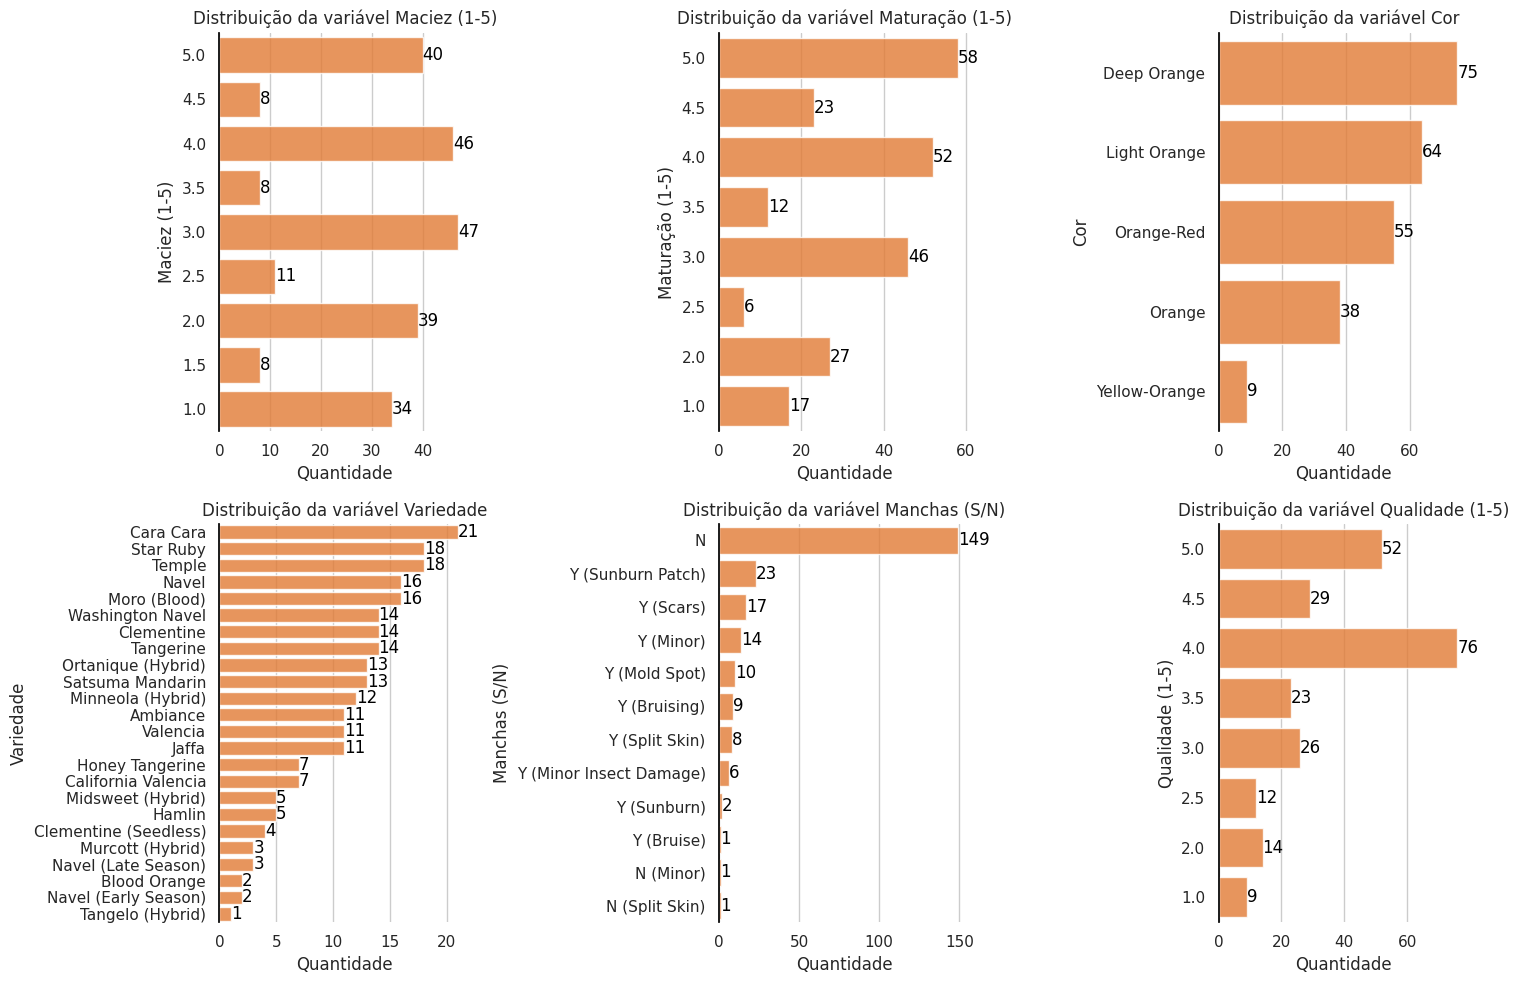

In [ ]:
# @title Variáveis Qualitativas

var_quali = df_dict.query("tipo == 'qualitativa'").variavel.tolist()
fig, axes = plt.subplots(figsize=(15, 10), ncols=3, nrows=2)
axes = axes.flatten()

var_quali_especiais = ['Maciez (1-5)','Maturação (1-5)','Qualidade (1-5)']

for i, var in enumerate(var_quali):
    # Variáveis especiais em ordem decrescente por index
    if var in var_quali_especiais:
      order = pd.Series(df[var].unique()).sort_values(ascending=False)
    else:
    # Variáveis em ordem decrescente por frequência
      order = df[var].value_counts().index

    # Plotagem do gráfico
    ax = sns.countplot(df,
                       y=var,
                       ax=axes[i],
                       order=order,
                       alpha=.8,
                       color="#FF7518")
    ax.bar_label(ax.containers[0], fmt="%d", color="black")
    ax.set(title=f"Distribuição da variável {var}", xlabel="Quantidade")

    # Bordas
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")

plt.tight_layout()
plt.show()

---
- O nível de maciez das laranjas é relativamente equilibrado para os valores inteiros.
- Laranjas mais maduras são mais populares na amostra.
- A grande maioria das laranjas (149) não possui nenhuma mancha.
- Os tipos de mancha mais comuns são `manchas de sol` (23), `cicatrizes` (17) e `manchas pequenas` (14).
- Laranjas com qualidade a partir do valor `4` são mais comuns.



---

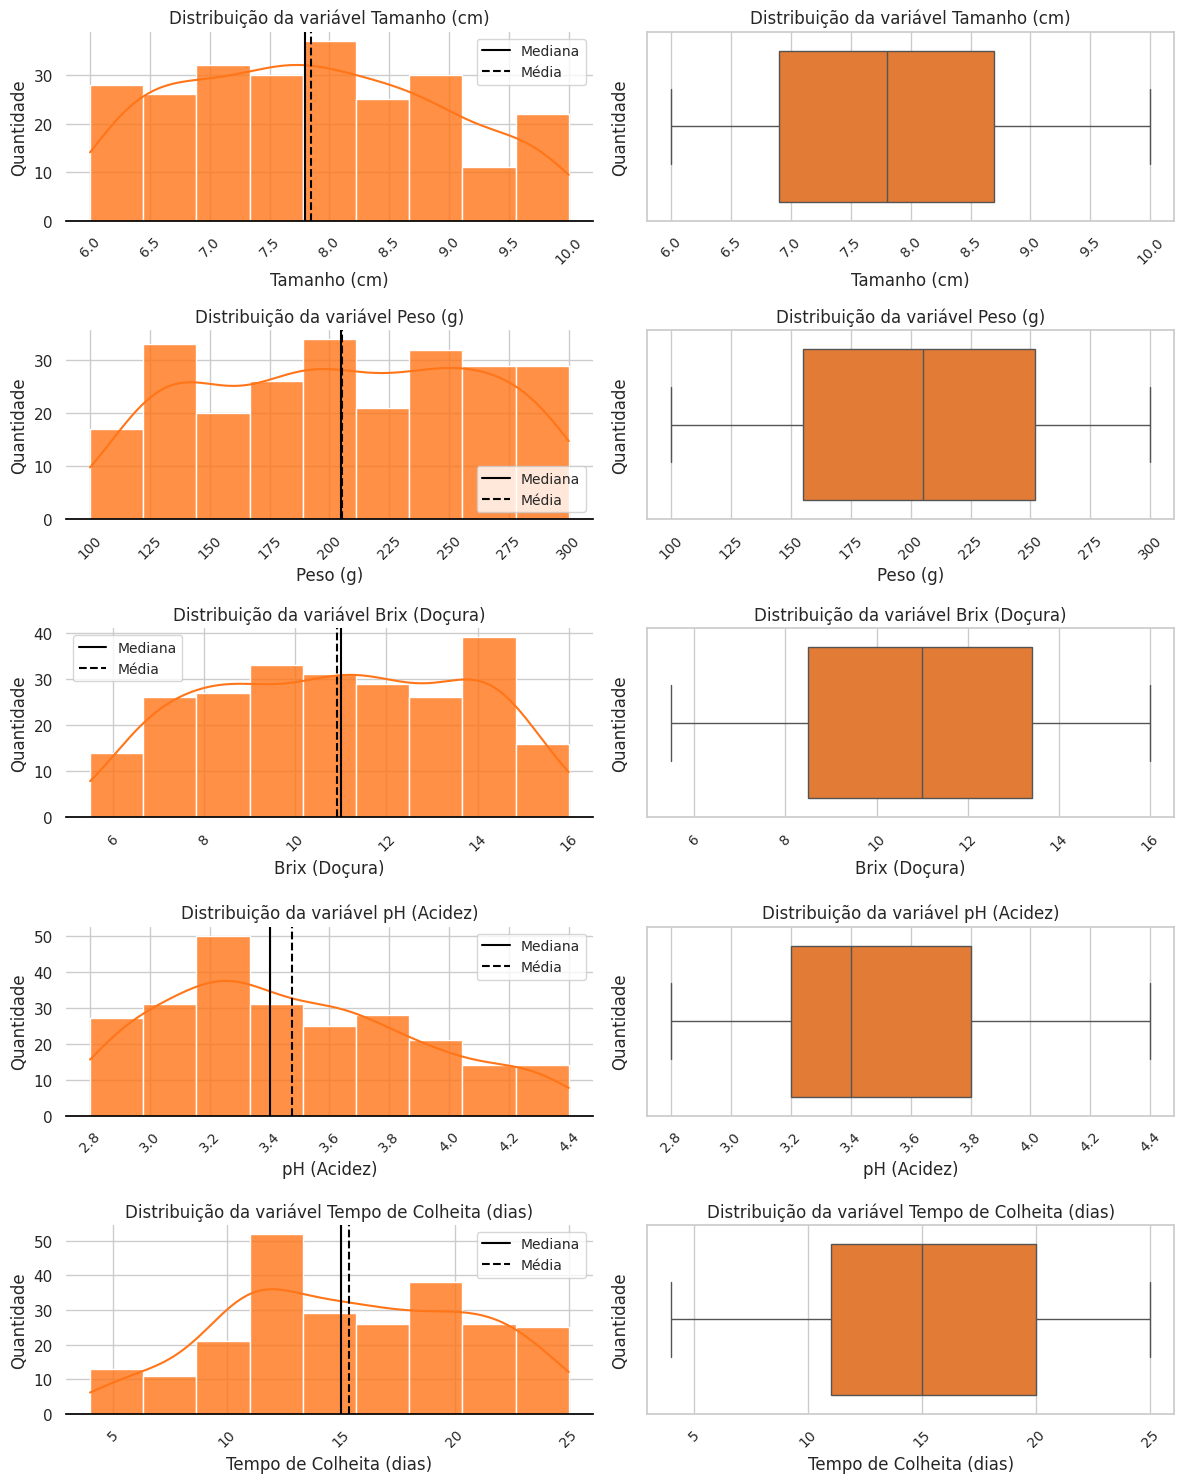

In [ ]:
# @title Variáveis quantitativas

variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()
num_vars = len(variaveis_quantitativas)

num_cols = 2
num_rows = num_vars

fig, axes = plt.subplots(figsize=(12, 3 * num_vars), ncols=num_cols, nrows=num_rows)

for i, variavel in enumerate(variaveis_quantitativas):
    # Histograma
    ax_hist = axes[i, 0]
    sns.histplot(data=df,
                 x=variavel,
                 ax=ax_hist,
                 kde=True,
                 alpha=.8,
                 color='#FF7518')
    ax_hist.axvline(df[variavel].median(), color="black", label="Mediana")
    ax_hist.axvline(df[variavel].mean(), color="black", linestyle="--", label="Média")

    # Título e legenda
    ax_hist.set(title=f"Distribuição da variável {variavel}", ylabel="Quantidade")
    ax_hist.legend(fontsize='small')

    # Bordas
    ax_hist.spines["bottom"].set_color("black")
    for side in ["left", "top", "right"]:
        ax_hist.spines[side].set_visible(False)
        ax_hist.tick_params(axis='x', rotation=45, labelsize='small')

    # Boxplot
    ax_box = axes[i, 1]
    sns.boxplot(data=df,
                x=variavel,
                ax=ax_box,
                color='#FF7518')

    # Título
    ax_box.set(title=f"Distribuição da variável {variavel}", ylabel="Quantidade")
    ax_box.tick_params(axis='x', rotation=45, labelsize='small')

plt.tight_layout()
plt.show()

---
Distribuição da variável `Tamanho (cm)`
- O tamanho mais comum das laranjas é de `8cm`.
- A distribuição dessa variável é equilibrada.
- Laranjas de tamanho `9.5 cm` são mais raras.

Distribuição da variável `Peso (g)`
 - O peso mais comum é de `200g`.
 - A grande maioria das laranjas pesam mais de 125g.

Distribuição da variável `Brix (Doçura)`
 - O nível de doçura mais comum para as laranjas é de `14 Brix`.
 - Níveis de doçura menores que `8 Brix` e maiores que `14 Brix` são raros.

Distribuição da variável `pH (Acidez)`
 - O nível de pH mais comum é de `3.2`.
 - A maioria das laranjas possui pH acima de `3.4`.
 - A média está deslocada em relação à mediana, o que pode indicar valores mais altos puxando a média para cima.
 - A distribuição é assimétrica para a esquerda.

Distribuição da variável `Tempo de Colheita (dias)`
 - O tempo de colheita mais popular é de `10 a 15 dias`.
 - A distribuição é assimétrica para a direita.


---

### Dados faltantes

In [ ]:
df.isnull().sum()

Tamanho (cm)                0
Peso (g)                    0
Brix (Doçura)               0
pH (Acidez)                 0
Maciez (1-5)                0
Tempo de Colheita (dias)    0
Maturação (1-5)             0
Cor                         0
Variedade                   0
Manchas (S/N)               0
Qualidade (1-5)             0
dtype: int64

In [ ]:
# Avaliando os valores únicos de cada variável a procura de valores ausentes mascarados
for col in df.columns:
    display(f"Coluna: {col}")
    display(df[col].unique())
    display("-" * 30)

'Coluna: Tamanho (cm)'

array([ 7.5,  8.2,  6.8,  9. ,  8.5,  6.7,  7.2,  6.5,  8.8,  7.8,  9.5,
        8. ,  7. ,  9.2,  6.3,  8.7,  9.6,  7.4, 10. ,  8.1,  7.6,  9.8,
        7.9,  8.4,  8.3,  7.1,  7.7,  8.9,  6.2,  8.6,  7.3,  9.7,  6.4,
        6.6,  9.4,  6.1,  9.9,  9.1,  6. ,  9.3,  6.9])

'------------------------------'

'Coluna: Peso (g)'

array([180, 220, 150, 250, 210, 126, 160, 130, 240, 190, 270, 183, 200,
       140, 260, 120, 230, 218, 247, 170, 300, 205, 280, 215, 111, 177,
       185, 245, 110, 225, 165, 285, 175, 125, 135, 275, 105, 290, 255,
       235, 100, 145, 115, 158, 192, 127, 118, 202, 123, 143, 269, 152,
       184, 137, 236, 279, 293, 209, 246, 253, 298, 169, 252, 297, 243,
       108, 117, 234, 276, 155, 198, 122, 257, 157, 296, 187, 129, 292,
       281, 222, 139, 238, 264, 217, 294, 206, 274, 168, 106, 141, 176,
       256, 151, 258, 179, 288, 263, 204, 291, 259, 171, 182, 112, 273,
       283, 195, 261, 193, 277, 299, 162, 142, 138, 128, 197, 149, 237,
       146, 233, 248, 228, 267, 265, 189, 147, 131, 249, 251, 194, 196,
       282])

'------------------------------'

'Coluna: Brix (Doçura)'

array([12. , 10.5, 14. ,  8.5, 11.5,  9.1,  9. , 13.5,  7.5,  6. , 14.8,
       10. , 11. ,  9.5, 14.5,  8. , 14.1, 12.5,  7. ,  6.5, 13. ,  8.6,
       15. ,  5.5, 11.2, 12.6, 14.2,  8.1, 11.3, 14.3,  6.8,  6.7, 15.1,
       14.7,  6.4,  7.4, 12.4, 10.4, 11.1, 11.8, 15.9, 12.7, 12.2,  7.3,
       13.7,  9.3,  6.6, 10.6,  8.2, 14.6, 13.2,  9.2, 16. , 14.9,  7.7,
        7.6, 15.8, 13.4, 15.2, 10.2, 15.4, 13.9, 14.4, 11.9,  6.9, 11.4,
       12.1,  6.2,  8.4,  9.9, 13.6,  6.3,  9.8, 12.8, 13.1,  8.7, 10.9,
        7.2, 15.6,  6.1,  8.3, 15.7])

'------------------------------'

'Coluna: pH (Acidez)'

array([3.2 , 3.4 , 3.  , 3.8 , 3.3 , 3.5 , 2.8 , 4.  , 3.1 , 4.2 , 3.7 ,
       2.9 , 3.9 , 4.1 , 4.3 , 3.6 , 4.4 , 3.43, 3.72, 3.32, 3.29, 4.09,
       3.98, 2.82, 3.53, 3.67, 3.97, 3.33, 3.85, 2.86, 3.54, 3.36, 2.88,
       3.61, 3.41, 4.35, 2.92, 4.37, 2.97, 3.58, 4.33, 3.39, 3.17, 3.65])

'------------------------------'

'Coluna: Maciez (1-5)'

array([2. , 3. , 1. , 4. , 2.5, 3.5, 1.5, 5. , 4.5])

'------------------------------'

'Coluna: Tempo de Colheita (dias)'

array([10, 14,  7, 21, 12, 25,  9,  5, 18, 11, 24, 13,  8, 20,  6, 17, 23,
       16, 15, 19, 22,  4])

'------------------------------'

'Coluna: Maturação (1-5)'

array([4. , 4.5, 5. , 3.5, 2. , 3. , 2.5, 1. ])

'------------------------------'

'Coluna: Cor'

array(['Orange', 'Deep Orange', 'Light Orange', 'Orange-Red',
       'Yellow-Orange'], dtype=object)

'------------------------------'

'Coluna: Variedade'

array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', 'Hamlin',
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Washington Navel', 'Star Ruby', 'Tangerine',
       'Ambiance', 'California Valencia', 'Honey Tangerine',
       'Navel (Late Season)', 'Clementine (Seedless)', 'Temple',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Navel (Early Season)', 'Ortanique (Hybrid)'], dtype=object)

'------------------------------'

'Coluna: Manchas (S/N)'

array(['N', 'Y (Minor)', 'Y (Sunburn)', 'Y (Mold Spot)', 'Y (Bruise)',
       'Y (Split Skin)', 'Y (Sunburn Patch)', 'Y (Scars)',
       'Y (Minor Insect Damage)', 'Y (Bruising)', 'N (Minor)',
       'N (Split Skin)'], dtype=object)

'------------------------------'

'Coluna: Qualidade (1-5)'

array([4. , 4.5, 5. , 3.5, 1. , 3. , 2.5, 2. ])

'------------------------------'

---

Não há dados faltantes.

---

## Análise bivariada

### Relação entre variáveis quantitativas

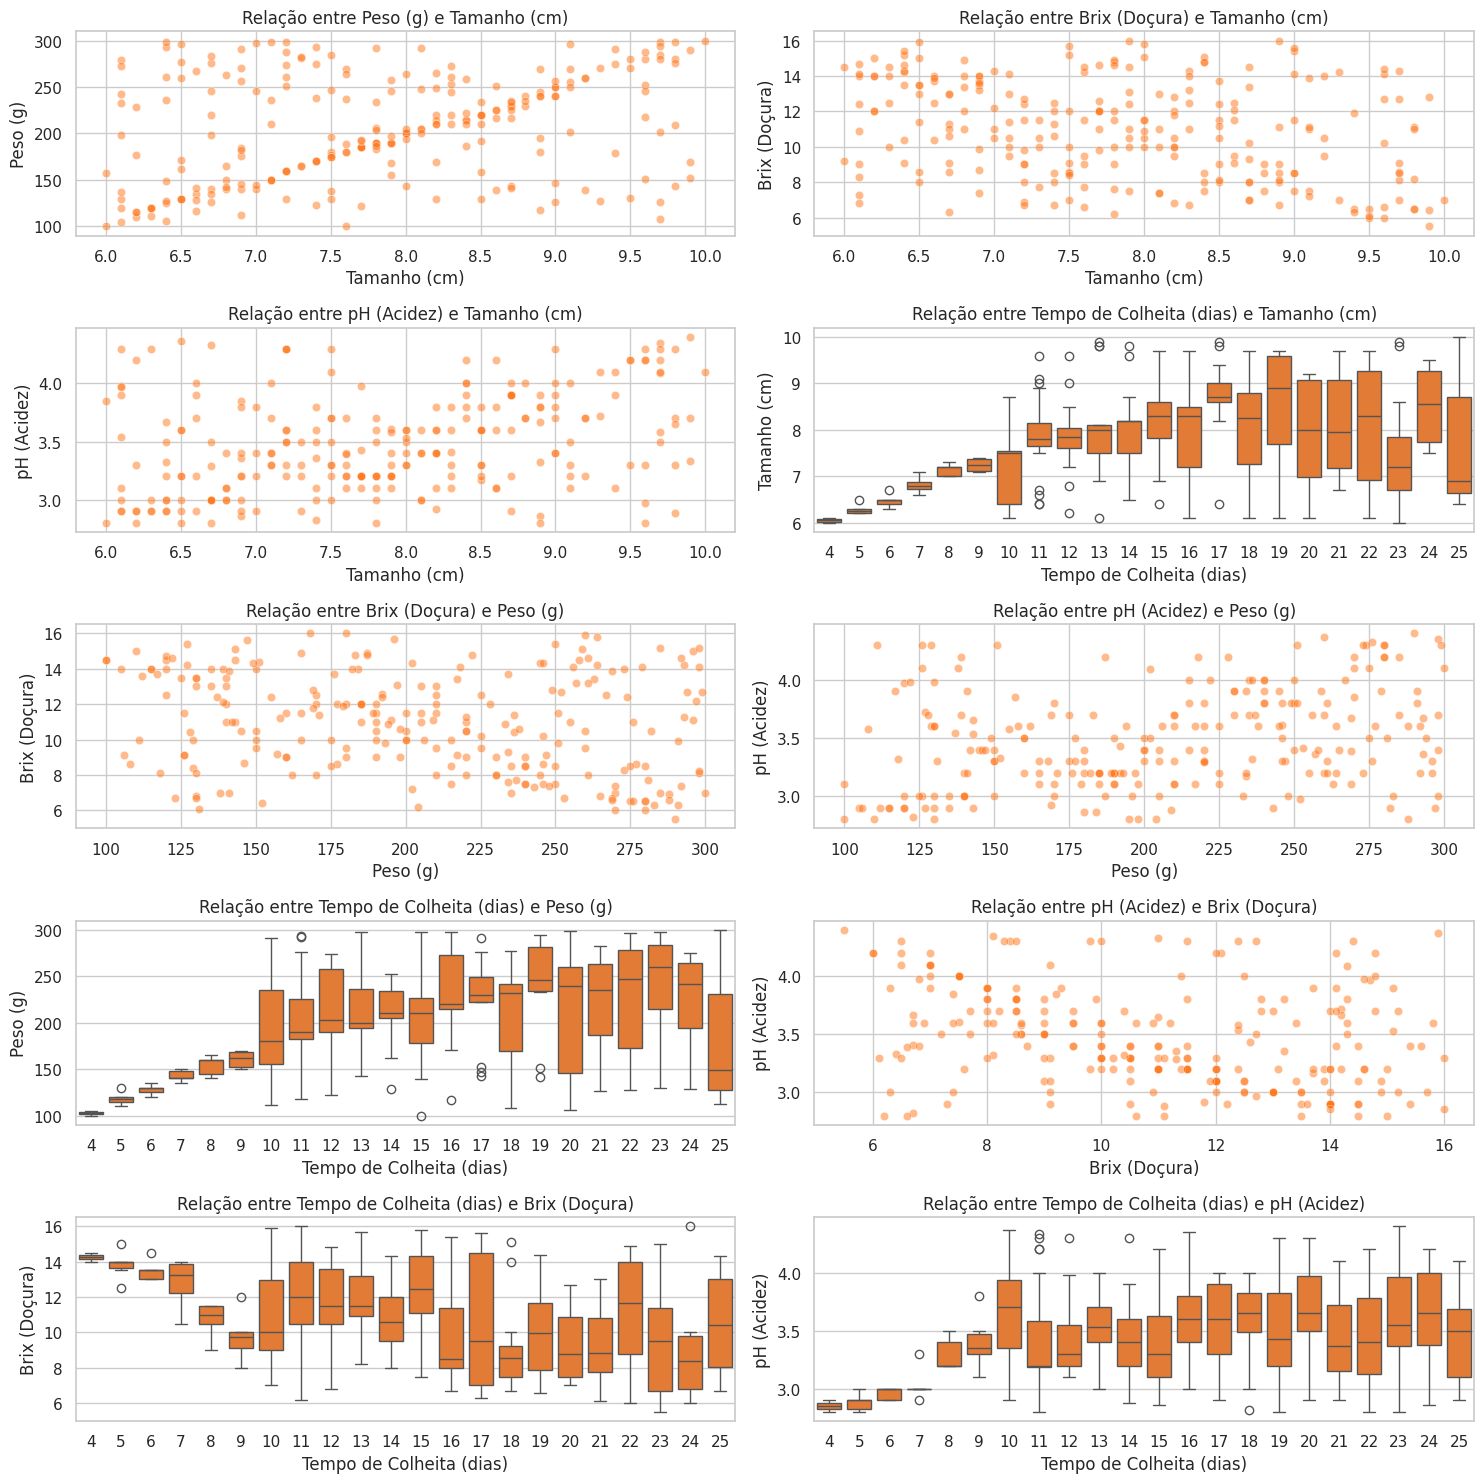

In [ ]:
# @title Comportamento par a par
combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))

num_cols = 2
num_rows = -(-len(combinacoes) // num_cols)

fig, axes = plt.subplots(figsize=(15, 3 * num_rows), ncols=num_cols, nrows=num_rows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()

    if len(set(subtipos)) == 1:
        sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i], alpha=0.5, color="#FF7518")
    else:
        sns.boxplot(data=df, x=var_2, y=var_1, ax=axes[i], color="#FF7518")

    axes[i].set(title=f"Relação entre {var_2} e {var_1}")
    #axes[i].tick_params(axis='x', rotation=30, labelsize='small')

plt.tight_layout()
plt.show()

---
- O `Tempo de Colheita (dias)` influencia bastante o `Tamanho`, `Peso`, `Brix (Douçura)` e `pH (Acidez)` da fruta.
  - `Tempo de Colheita (dias)` intermediário apresenta maior `Brix (Doçura)`.
  - Maior `Tempo de Colheita (dias)` infere maior variedade de `Peso (g)` e `Tamanho (cm)` das laranjas.
- À medida que o `Tamanho` da fruta aumenta, o `Peso` e o `pH (Acidez)` aumentam, ao que a `Brix (Doçura)` diminui. Isso faz sentido biologicamente, pois frutas maiores tendem a ser mais pesadas e ácidas.
- A `Brix (Douçura)` e o `pH (Acidez)` da fruta aparentam ter uma correlação negativa.
---

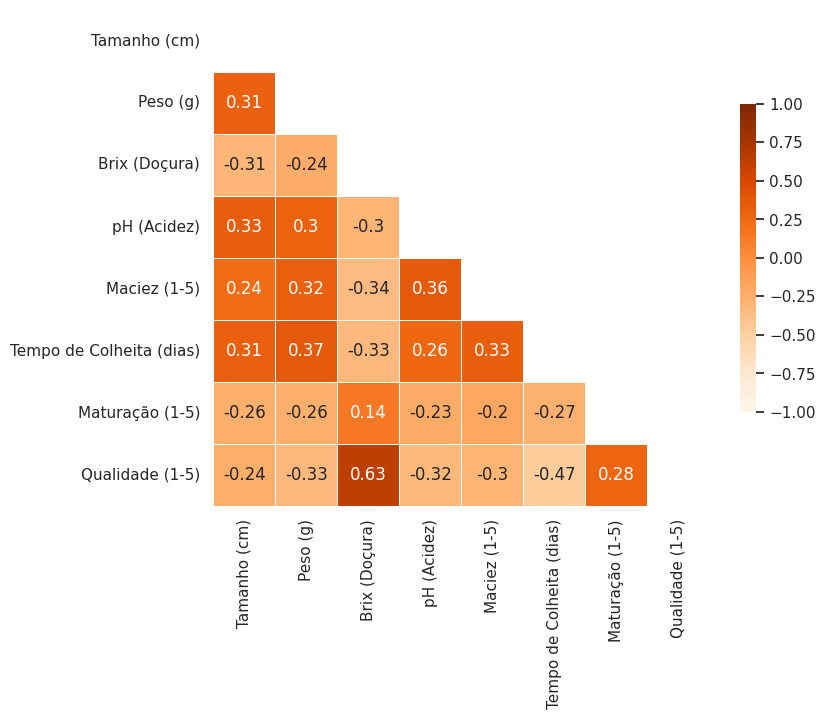

In [ ]:
# @title Correlação
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

f, ax = plt.subplots(figsize=(8, 8))

cmap = sns.color_palette("Oranges", as_cmap=True)

chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True
)
plt.show()

---
- Frutas maiores e mais pesadas são menos doces, de menor qualidade e mais ácidas.
- Frutas colhidas mais tarde perdem doçura e qualidade, mas ganham tamanho, peso e acidez.
- A `Qualidade` da fruta é fortemente influenciada pela `Brix (Doçura)` e, parcialmente, pela `Maturação (1-5)`
---


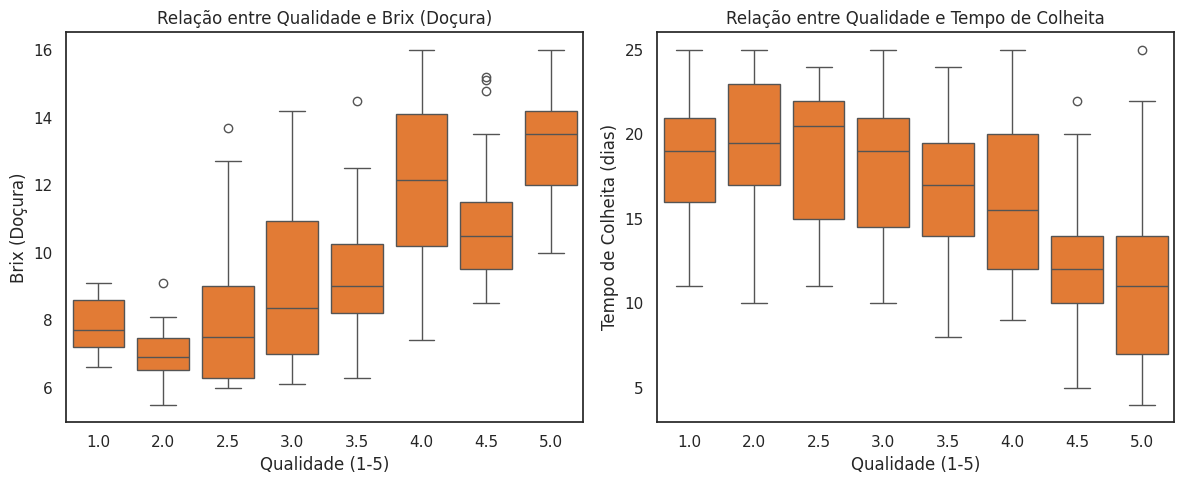

In [ ]:
# @title Gráficos das correlações mais fortes
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

sns.boxplot(data=df, x="Qualidade (1-5)", y="Brix (Doçura)", ax=axes[0], color="#FF7518")
axes[0].set(title="Relação entre Qualidade e Brix (Doçura)")

sns.boxplot(data=df, x="Qualidade (1-5)", y="Tempo de Colheita (dias)", ax=axes[1], color="#FF7518")
axes[1].set(title="Relação entre Qualidade e Tempo de Colheita")

plt.tight_layout()
plt.show()


### Relação entre variáveis qualitativas

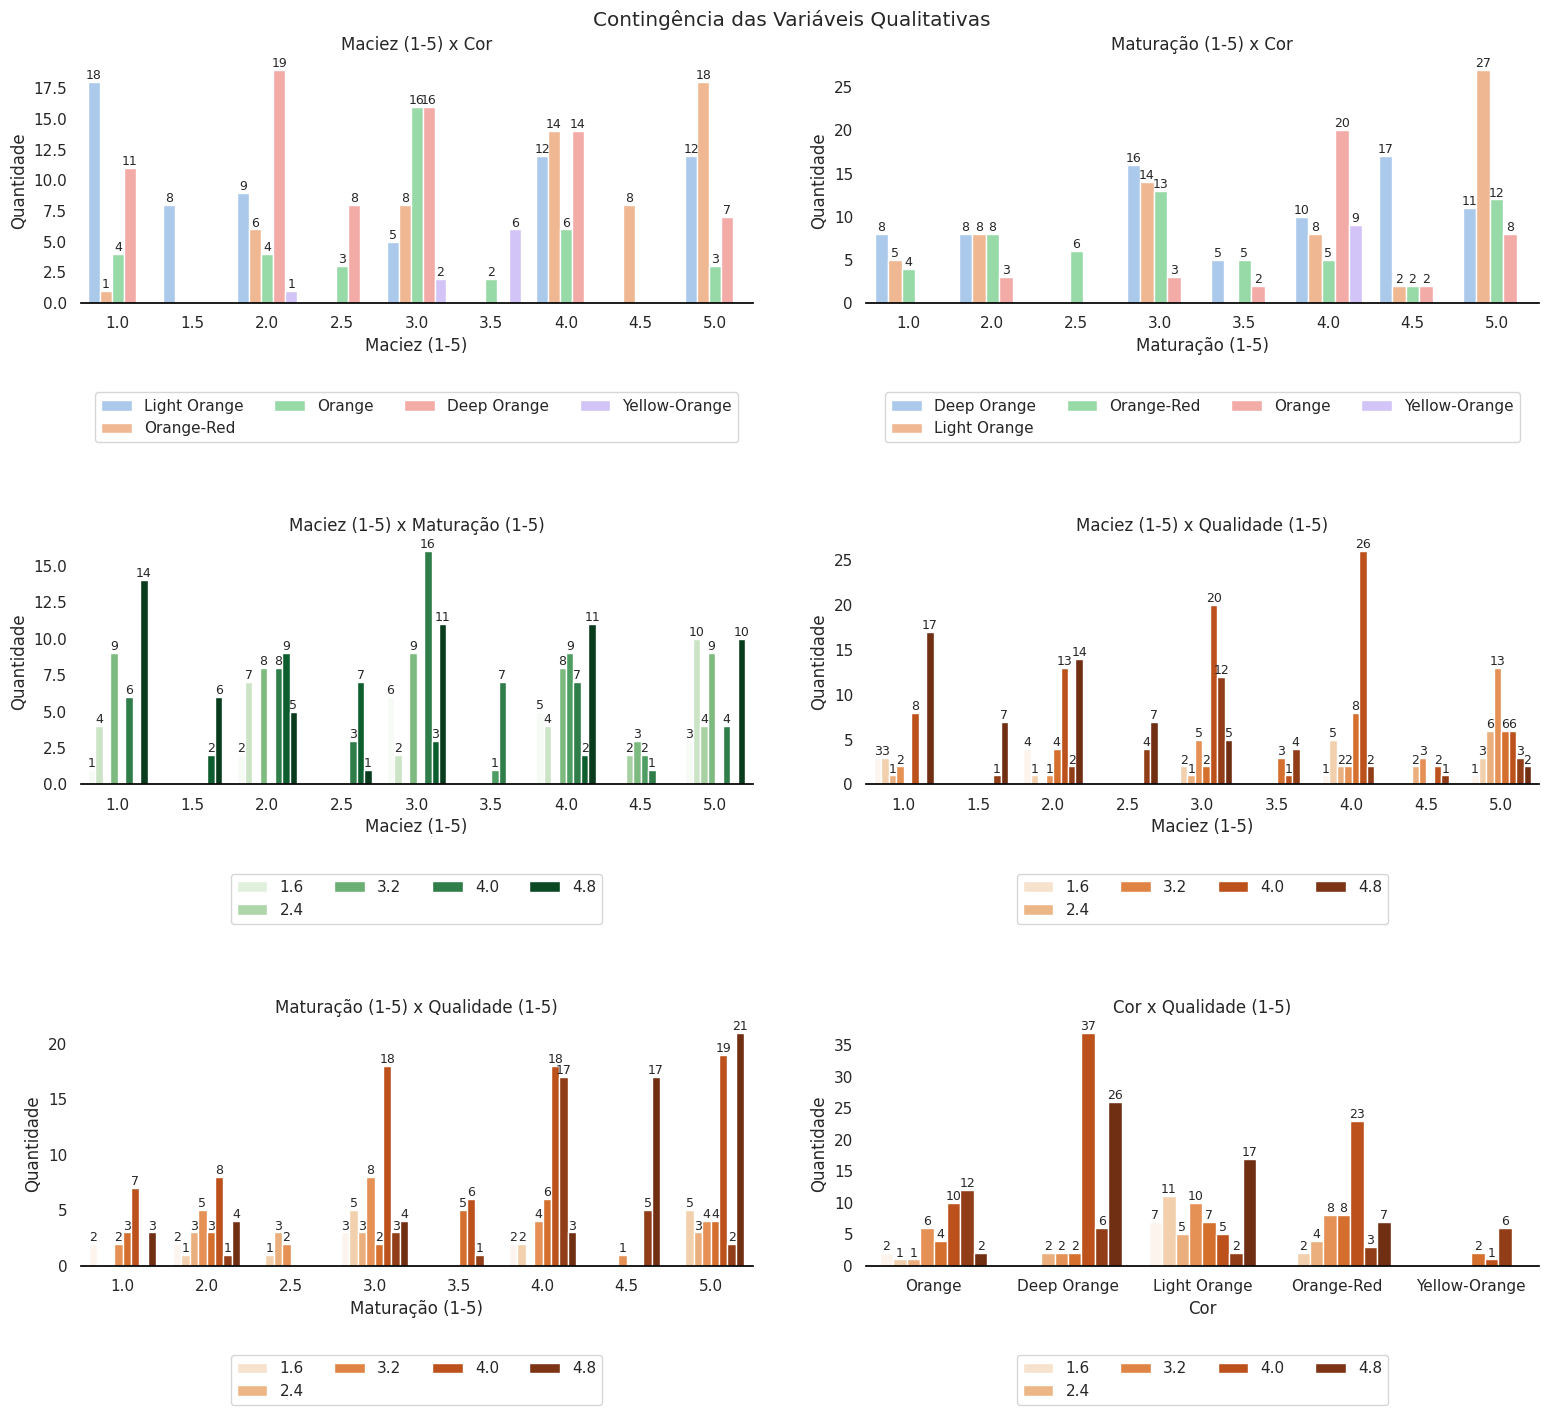

In [ ]:
# @title Contingência
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()
variaveis_qualitativas.remove("Variedade")
variaveis_qualitativas.remove("Manchas (S/N)")

palette_dict = {
    "Maciez (1-5)": "Blues",
    "Maturação (1-5)": "Greens",
    "Qualidade (1-5)": "Oranges"
}



combinacoes = sorted(
    itertools.combinations(variaveis_qualitativas, 2),
    key=lambda x: x[1]
)

num_graficos = len(combinacoes)
ncols = 2
nrows = -(-num_graficos // ncols)

fig, axes = plt.subplots(figsize=(16, 5 * nrows), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    order = None
    hue_order = None

    if var_2 in ["Maciez (1-5)", "Maturação (1-5)", "Qualidade (1-5)"]:
        hue_order = sorted(df[var_2].unique())
    if var_1 in ["Maciez (1-5)", "Maturação (1-5)", "Qualidade (1-5)"]:
        order = sorted(df[var_1].unique())

    ax = sns.countplot(df, x=var_1, hue=var_2, ax=axes[i], hue_order=hue_order, order=order, palette=palette_dict.get(var_2, "pastel"))

    for container in ax.containers:
        ax.bar_label(container, fmt="%d", fontsize=9)

    ax.set(title=f"{var_1} x {var_2}", xlabel=var_1, ylabel="Quantidade")

    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")

    sns.move_legend(
        axes[i], "lower center",
        bbox_to_anchor=(.5, -.6), ncol=4, title=None,
    )
plt.suptitle("Contingência das Variáveis Qualitativas")
plt.tight_layout()
plt.show()


---
- A cor `deep orange` é a que apresenta menor nível de maciez e a cor `orange red`, o maior.
- Uma maior maturação parece indicar maior qualidade.
- Laranjas de melhor qualidade apresentam baixa maciez.
- A cor `deep orange` parece apresentar a melhor qualidade.
---

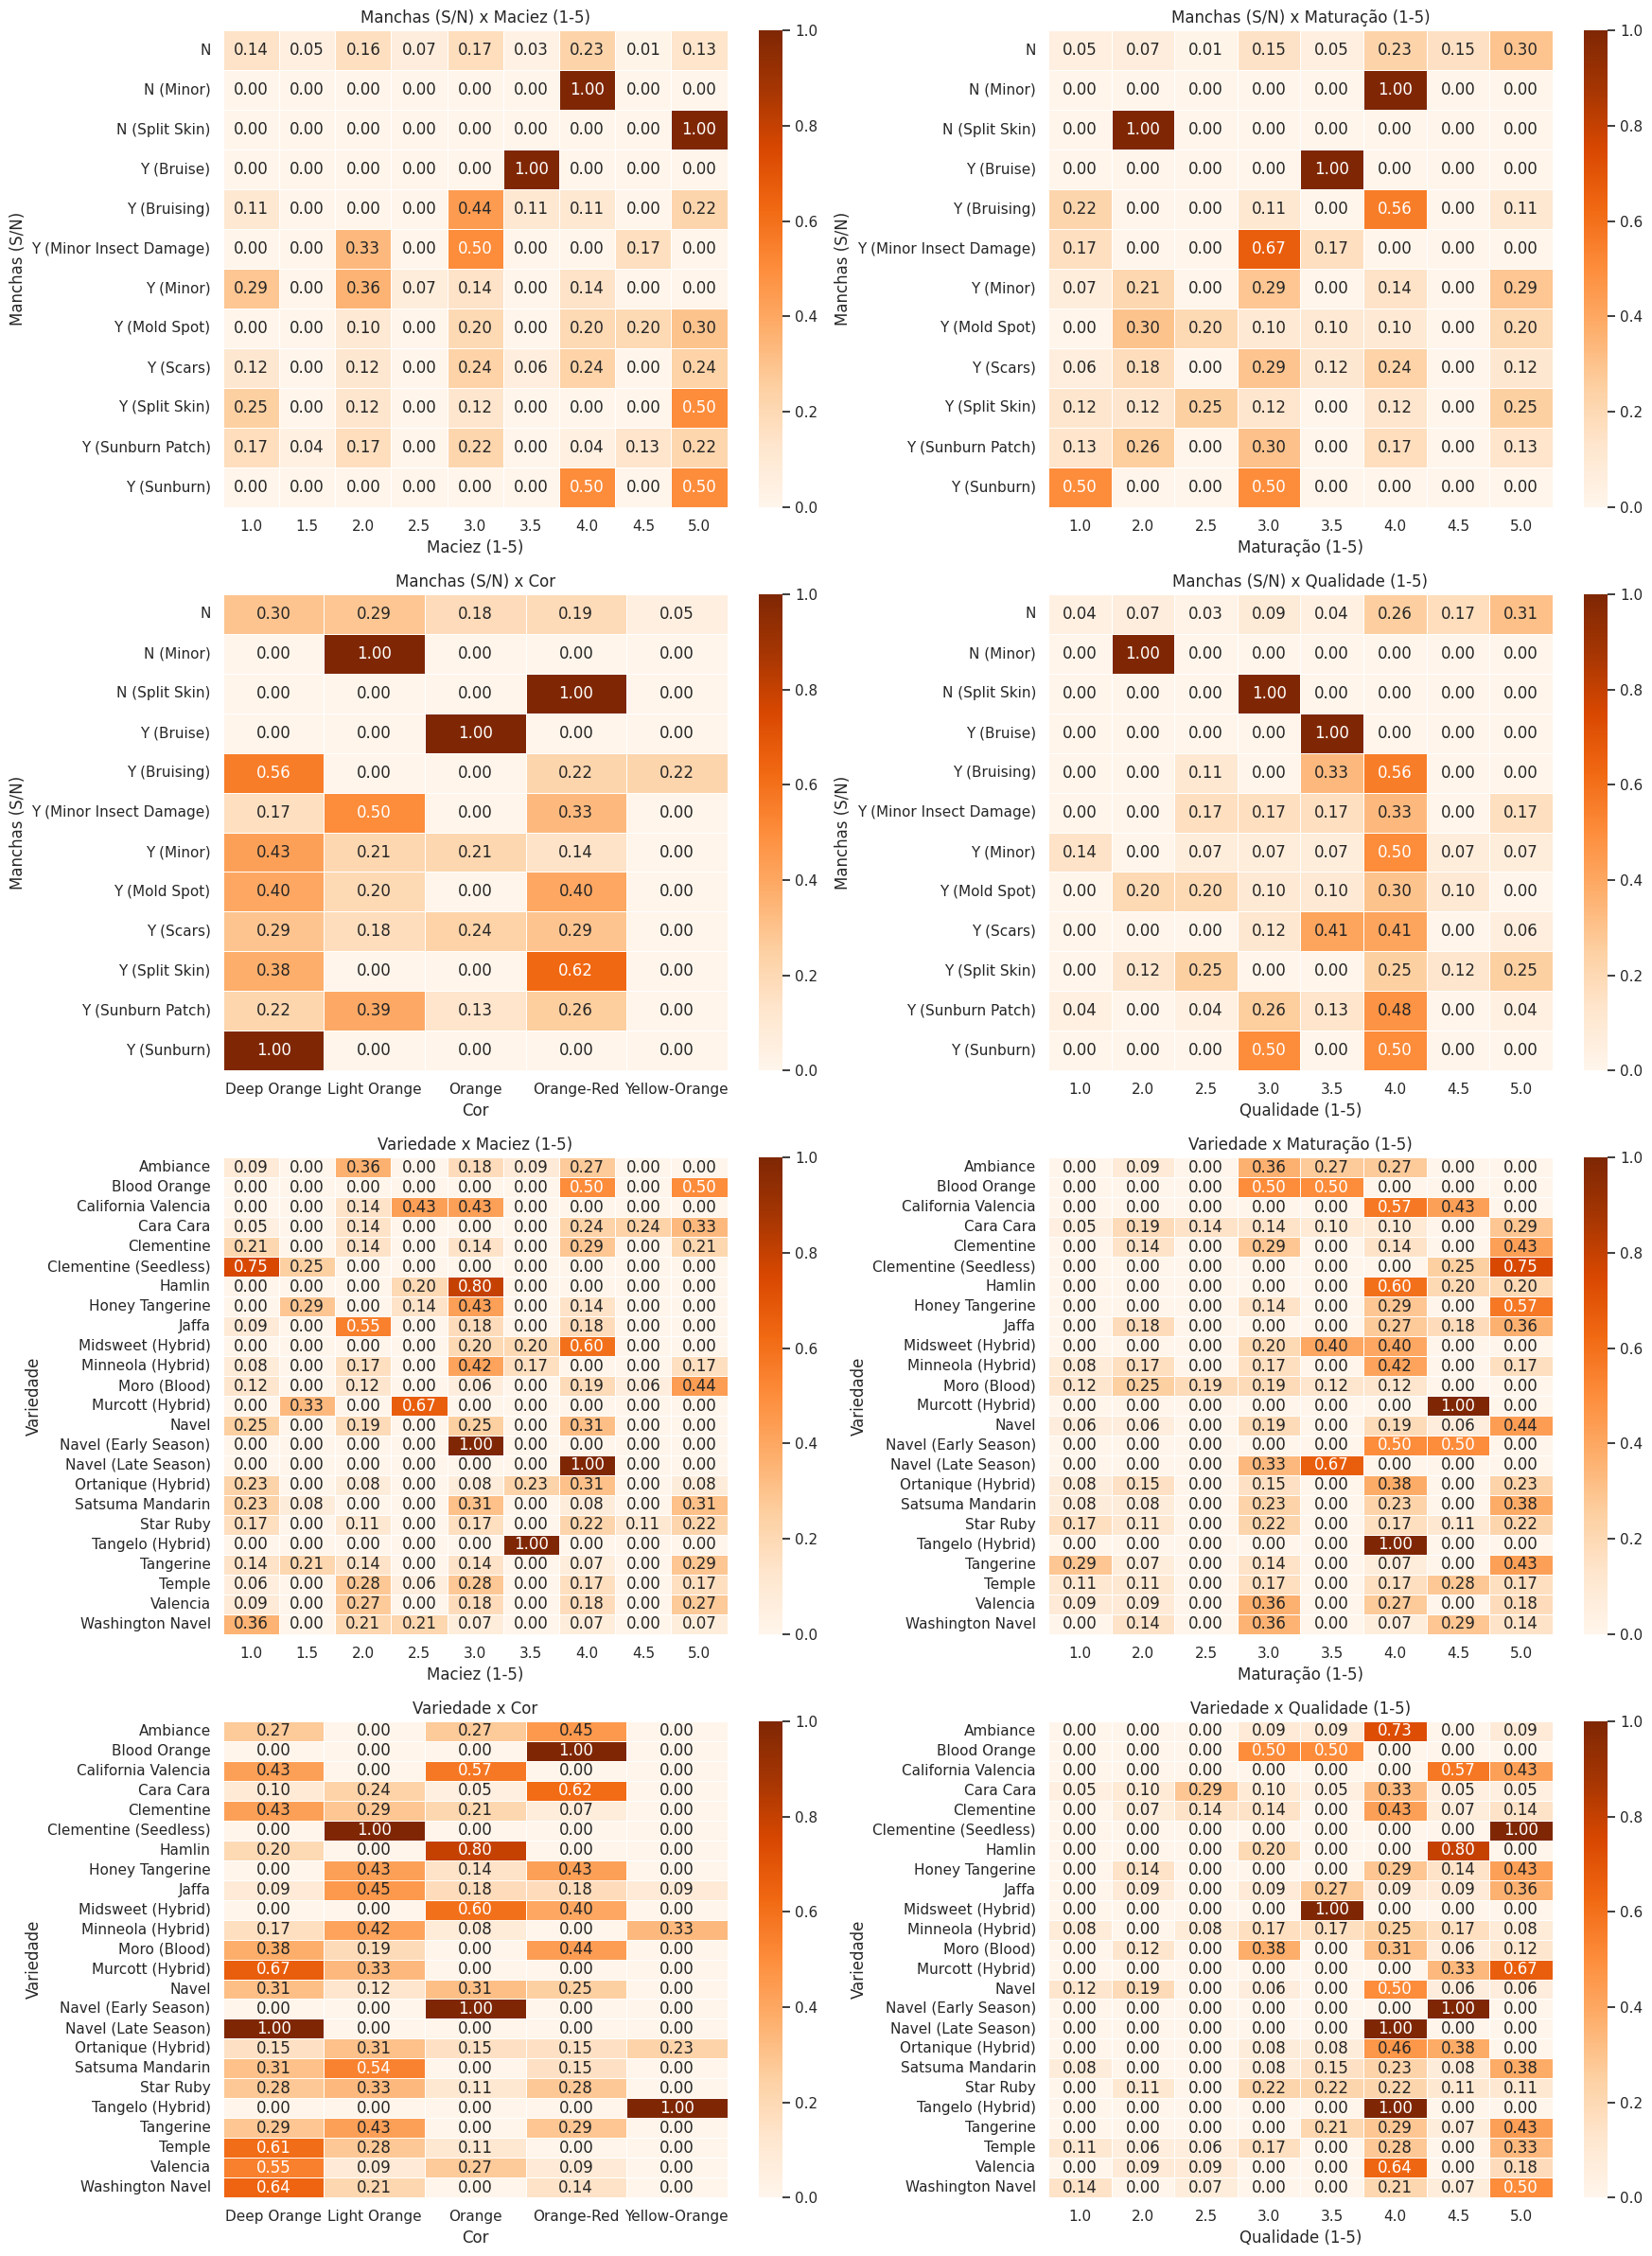

In [ ]:
# @title Heatmap de Contingência
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()

# Separar "Manchas (S/N)" e "Variedade"
variaveis_fixas = ["Manchas (S/N)", "Variedade"]
variaveis_outros = [v for v in variaveis_qualitativas if v not in variaveis_fixas]

combinacoes = [(fixa, outra) for fixa in variaveis_fixas for outra in variaveis_outros]

num_graficos = len(combinacoes)
ncols = 2
nrows = -(-num_graficos // ncols)

fig, axes = plt.subplots(figsize=(18, 6 * nrows), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    contingencia = pd.crosstab(df[var_1], df[var_2], normalize="index")

    sns.heatmap(contingencia, annot=True, cmap="Oranges", fmt=".2f", linewidths=0.5, ax=axes[i])

    axes[i].set_title(f"{var_1} x {var_2}")
    axes[i].set_xlabel(var_2)
    axes[i].set_ylabel(var_1)

plt.tight_layout()
plt.show()

---
- A contingência das variáveis faltantes foi representada por meio de heatmap para possibilitar a visualização, visto que o número elevado de variáveis tornou o gráfico de barras inviável.
---
- Frutas sem manchas ou com danos mínimos têm alta probabilidade de atingir `qualidade` 5.0.
- Variedades como `Clementine Seedless`, `California Valencia` e `Navel (Late Season)` se destacam pela consistência em qualidades 4+.

In [ ]:
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()

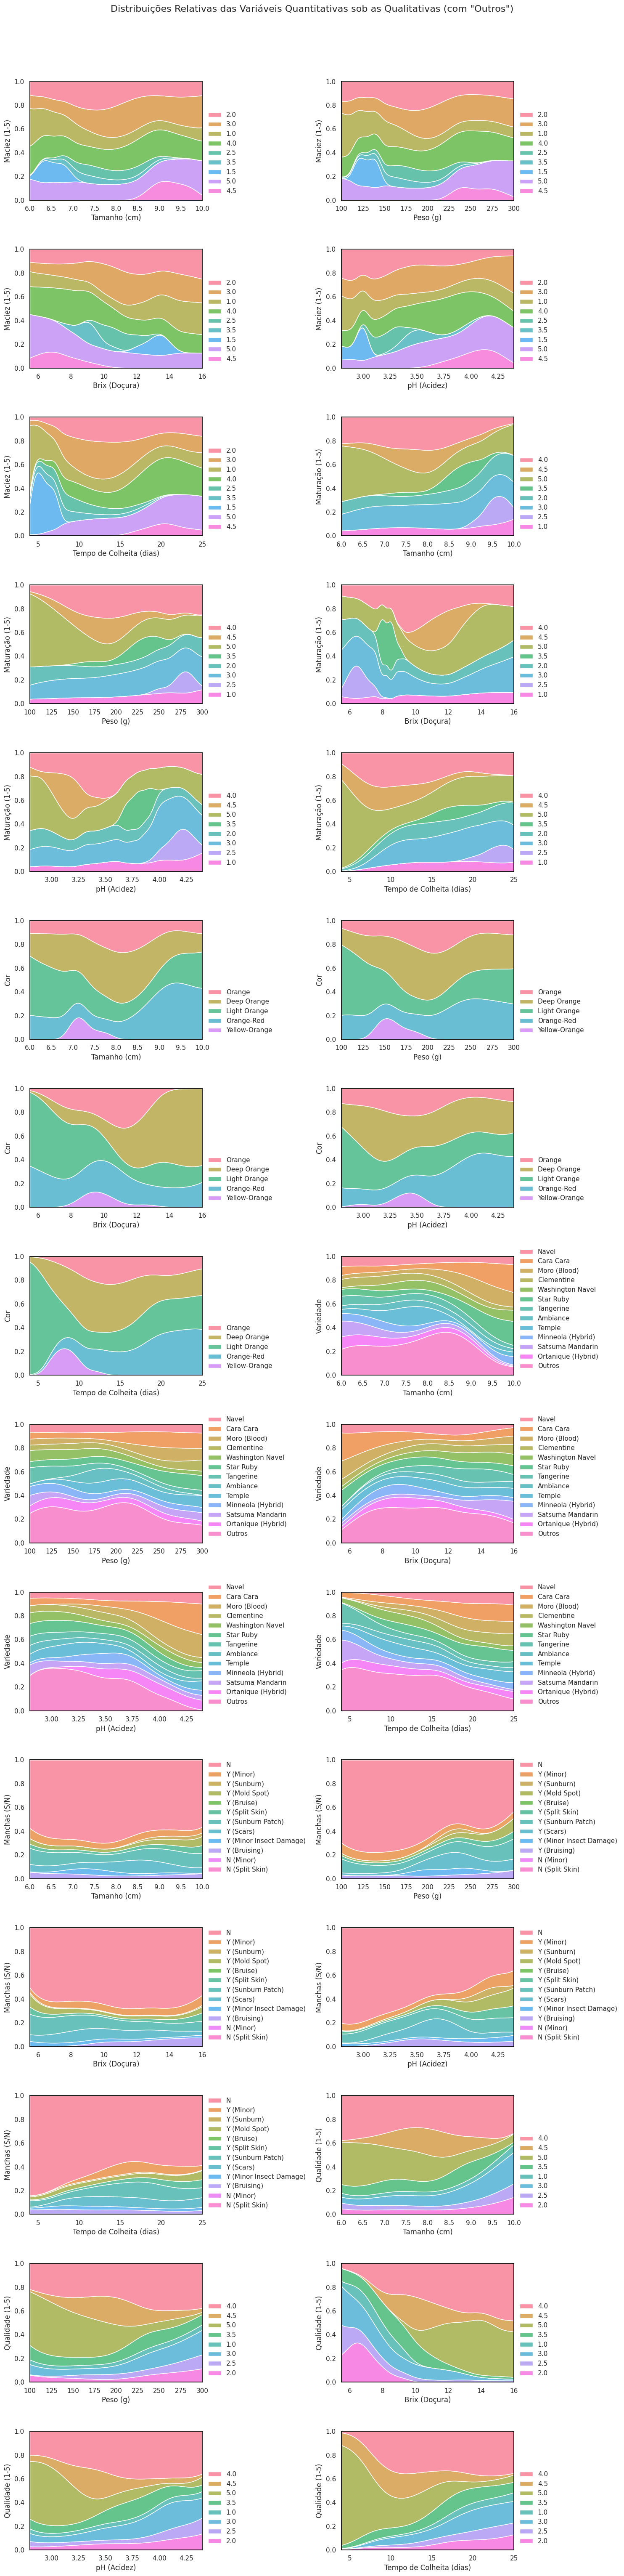

In [ ]:
# @title Distribuição relativa

# Dicionário de paletas de cores para variáveis categóricas (com no máx. 9 cores para incluir "Outros")
palette_dict = {
    var: sns.color_palette("husl", min(df[var].nunique(), 9)) for var in variaveis_qualitativas
}

def kde_plot(x, y, ax, i):
    """Plota a distribuição relativa de uma variável quantitativa para cada categoria de uma qualitativa,
    agrupando categorias raras como 'Outros'."""

    # Cria uma cópia do DataFrame original
    df_copia = df.copy()

    # Se houver muitas categorias, substitui as menos frequentes por "Outros"
    if df_copia[x].nunique() > 12:
        top_categorias = df_copia[x].value_counts().nlargest(12).index
        df_copia[x] = df_copia[x].where(df_copia[x].isin(top_categorias), other='Outros')

    # Define a ordem das categorias (deixa "Outros" por último)
    categorias = df_copia[x].unique()
    categorias_ordenadas = sorted(categorias, key=lambda cat: (cat == "Outros", cat != "Outros"))

    # Gera paleta de cores local com base nas categorias atuais
    palette = sns.color_palette("husl", len(categorias_ordenadas))
    palette_dict_local = dict(zip(categorias_ordenadas, palette))


    sns.kdeplot(
        data=df_copia, x=y, hue=x, hue_order=categorias_ordenadas, cut=0, multiple="fill",
        palette=palette_dict_local, ax=ax, warn_singular=False
    )

    ax.set(
        ylabel=x,
        xlabel=y
    )

    # Ajuste das bordas
    for side in ["left", "top", "right", "bottom"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color("black")

    # Mover legenda para fora
    sns.move_legend(ax, "lower left", bbox_to_anchor=(1, 0), title=None, frameon=False)

# Todas as combinações entre qualitativas e quantitativas
combinacoes = list(itertools.product(variaveis_qualitativas, variaveis_quantitativas))

# Layout com 2 colunas
num_cols = 2
num_rows = math.ceil(len(combinacoes) / num_cols)

fig, axes = plt.subplots(figsize=(15, num_rows * 4), ncols=num_cols, nrows=num_rows, squeeze=False, sharex=False, sharey=False)
axes = axes.flatten()

for i, (var_qualitativa, var_quantitativa) in enumerate(combinacoes):
    kde_plot(var_qualitativa, var_quantitativa, axes[i], i)

plt.suptitle('Distribuições Relativas das Variáveis Quantitativas sob as Qualitativas (com "Outros")', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

---
- Laranjas colhidas antes dos 10 dias tendem a apresentar qualidade 5.
- Laranjas com qualidade entre 4 e 5 predominam entre aquelas com níveis de doçura superiores a 10.
- Laranjas de qualidade 5 concentram-se na faixa de peso entre 100g e 200g e na faixa de pH de 3 até 3.25.
- Há uma leve tendência de laranjas menores serem menos macias.
- Laranjas de maturação 5 aparentam ser mais leves e com pH mais reduzido.
---

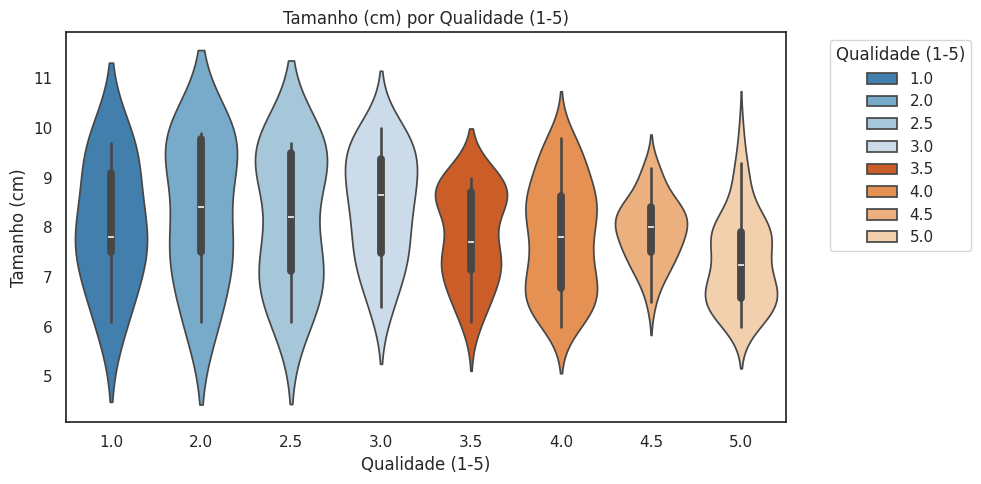

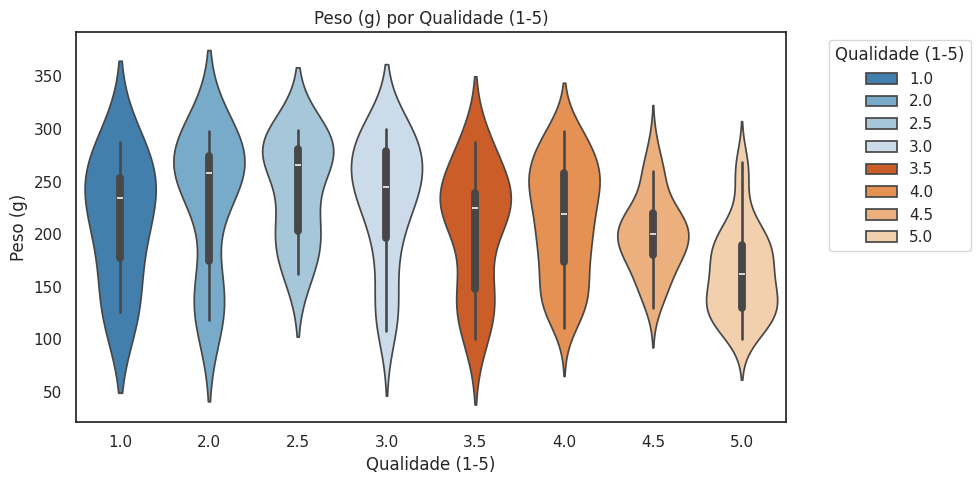

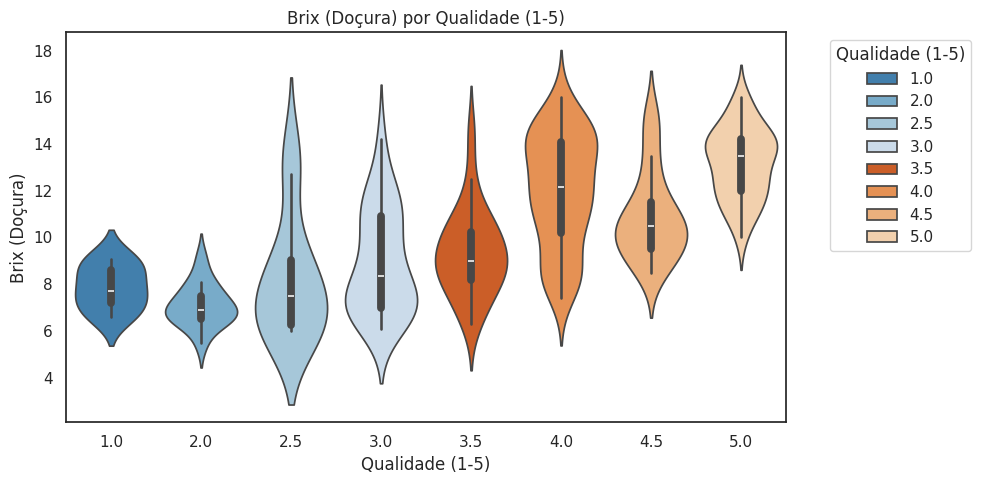

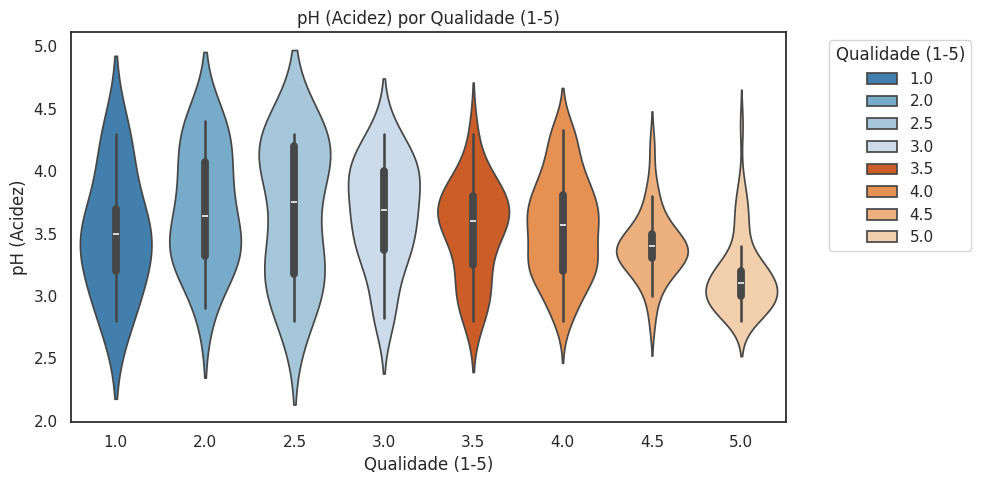

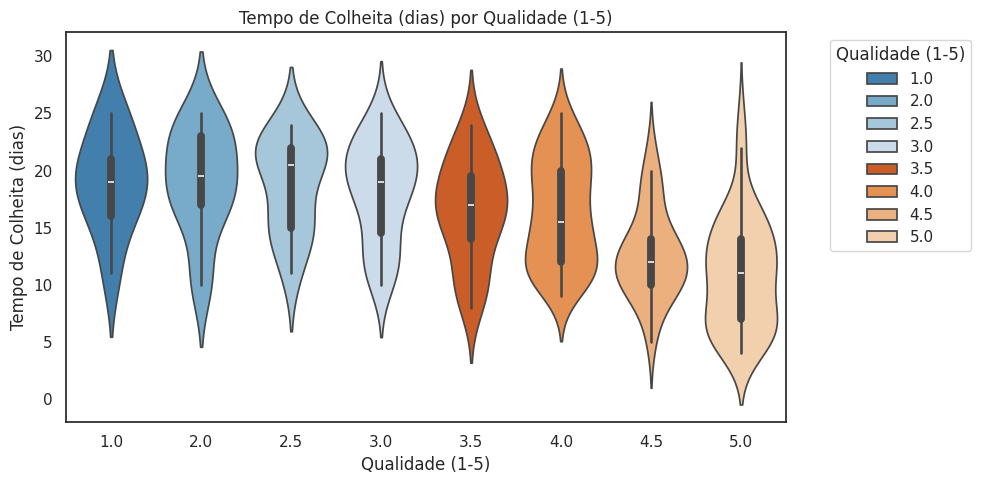

In [ ]:
# @title Distribuição conjunta
for num_var in variaveis_quantitativas:
    plt.figure(figsize=(10, 5))
    sns.violinplot(
        data=df,
        x='Qualidade (1-5)',
        y=num_var,
        palette='tab20c',
        hue='Qualidade (1-5)'
    )
    plt.title(f'{num_var} por Qualidade (1-5)')
    plt.xlabel('Qualidade (1-5)')
    plt.ylabel(num_var)

    plt.legend(title='Qualidade (1-5)', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


---
- Laranjas de melhor qualidade possuem: *menor* `Tamanho (cm)` de 6-8cm, *menor* `Peso (g)` de 100-200g, *maior* `Brix (Doçura)` de 12-16, *menor* `pH (Acidez)` de 3-3.5 e *menor* `Tempo de Colheita (dias)` de 5 a 15 dias.
---

## Análise Multivariada

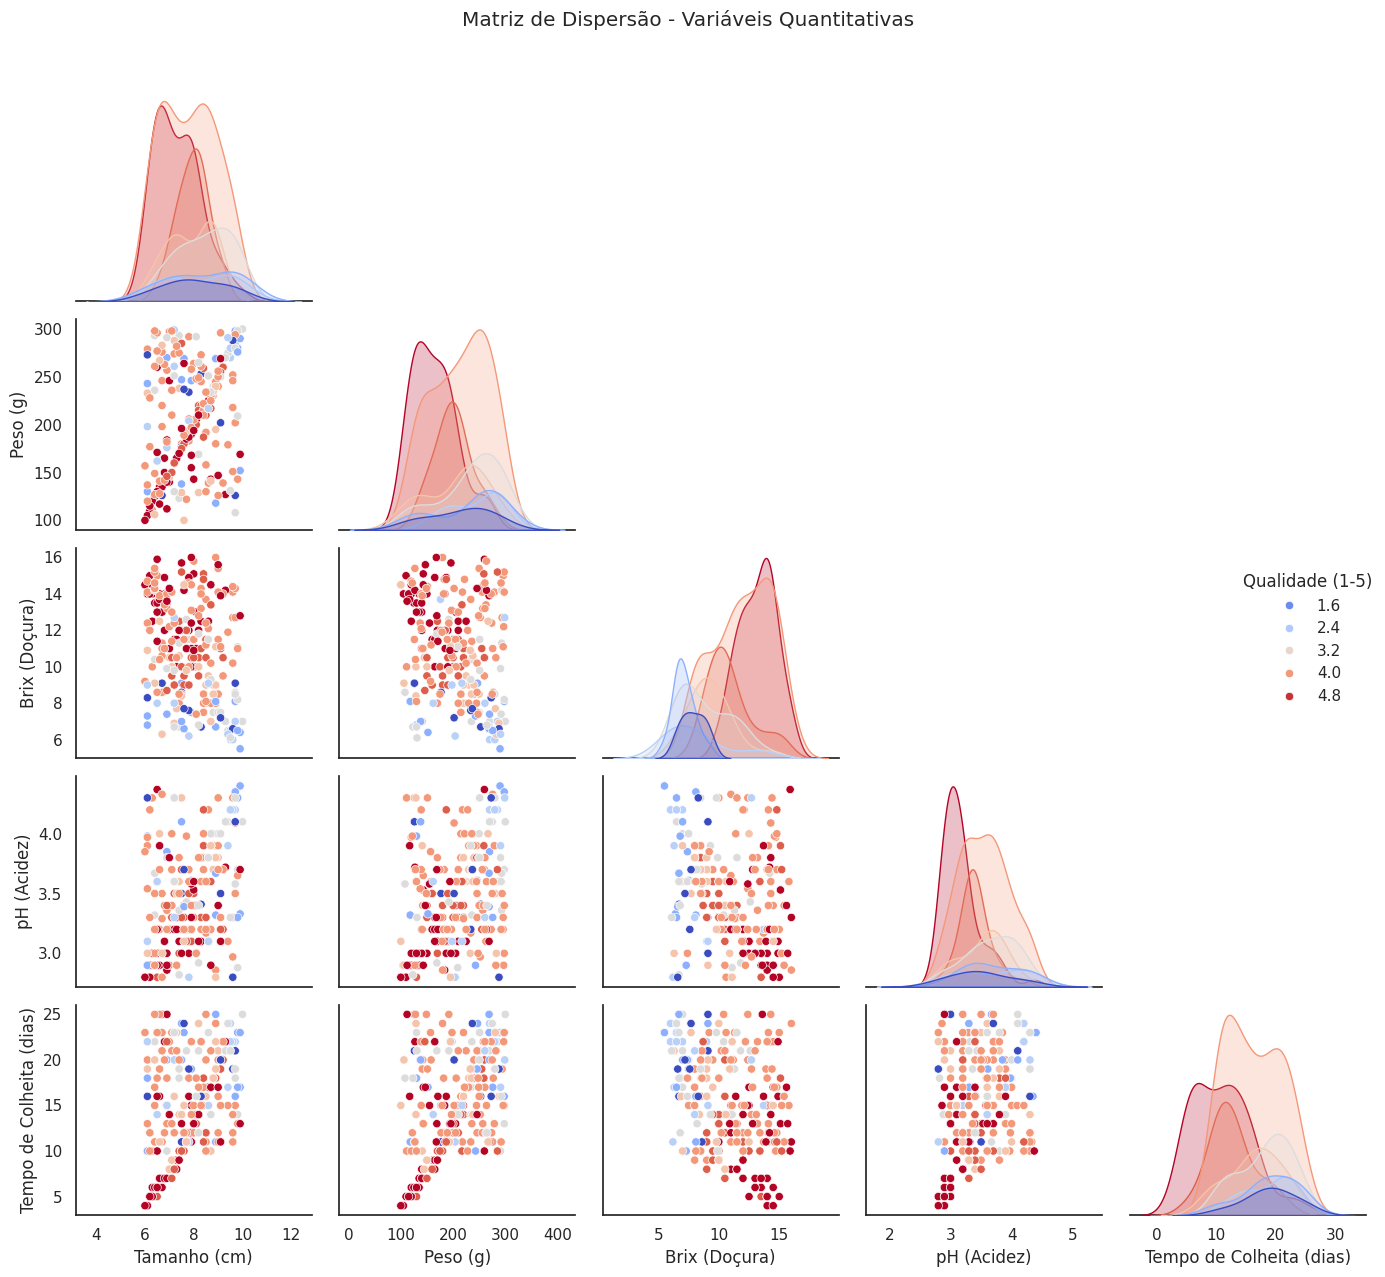

In [ ]:
# @title Matriz de Dispersão de Variáveis Quantitativas

# === Gráfico: Matriz de dispersão das variáveis quantitativas ===
sns.pairplot(
    df,
    vars=variaveis_quantitativas,
    hue="Qualidade (1-5)", corner=True,
    palette="coolwarm"
)
plt.suptitle("Matriz de Dispersão - Variáveis Quantitativas", y=1.02)
plt.tight_layout()
plt.show()


---
- Frutas colhidas mais cedo tendem a ser mais doces e de melhor `qualidade`
- Laranjas de alta qualidade tendem a ser menores, mais leves e mais doces.
---


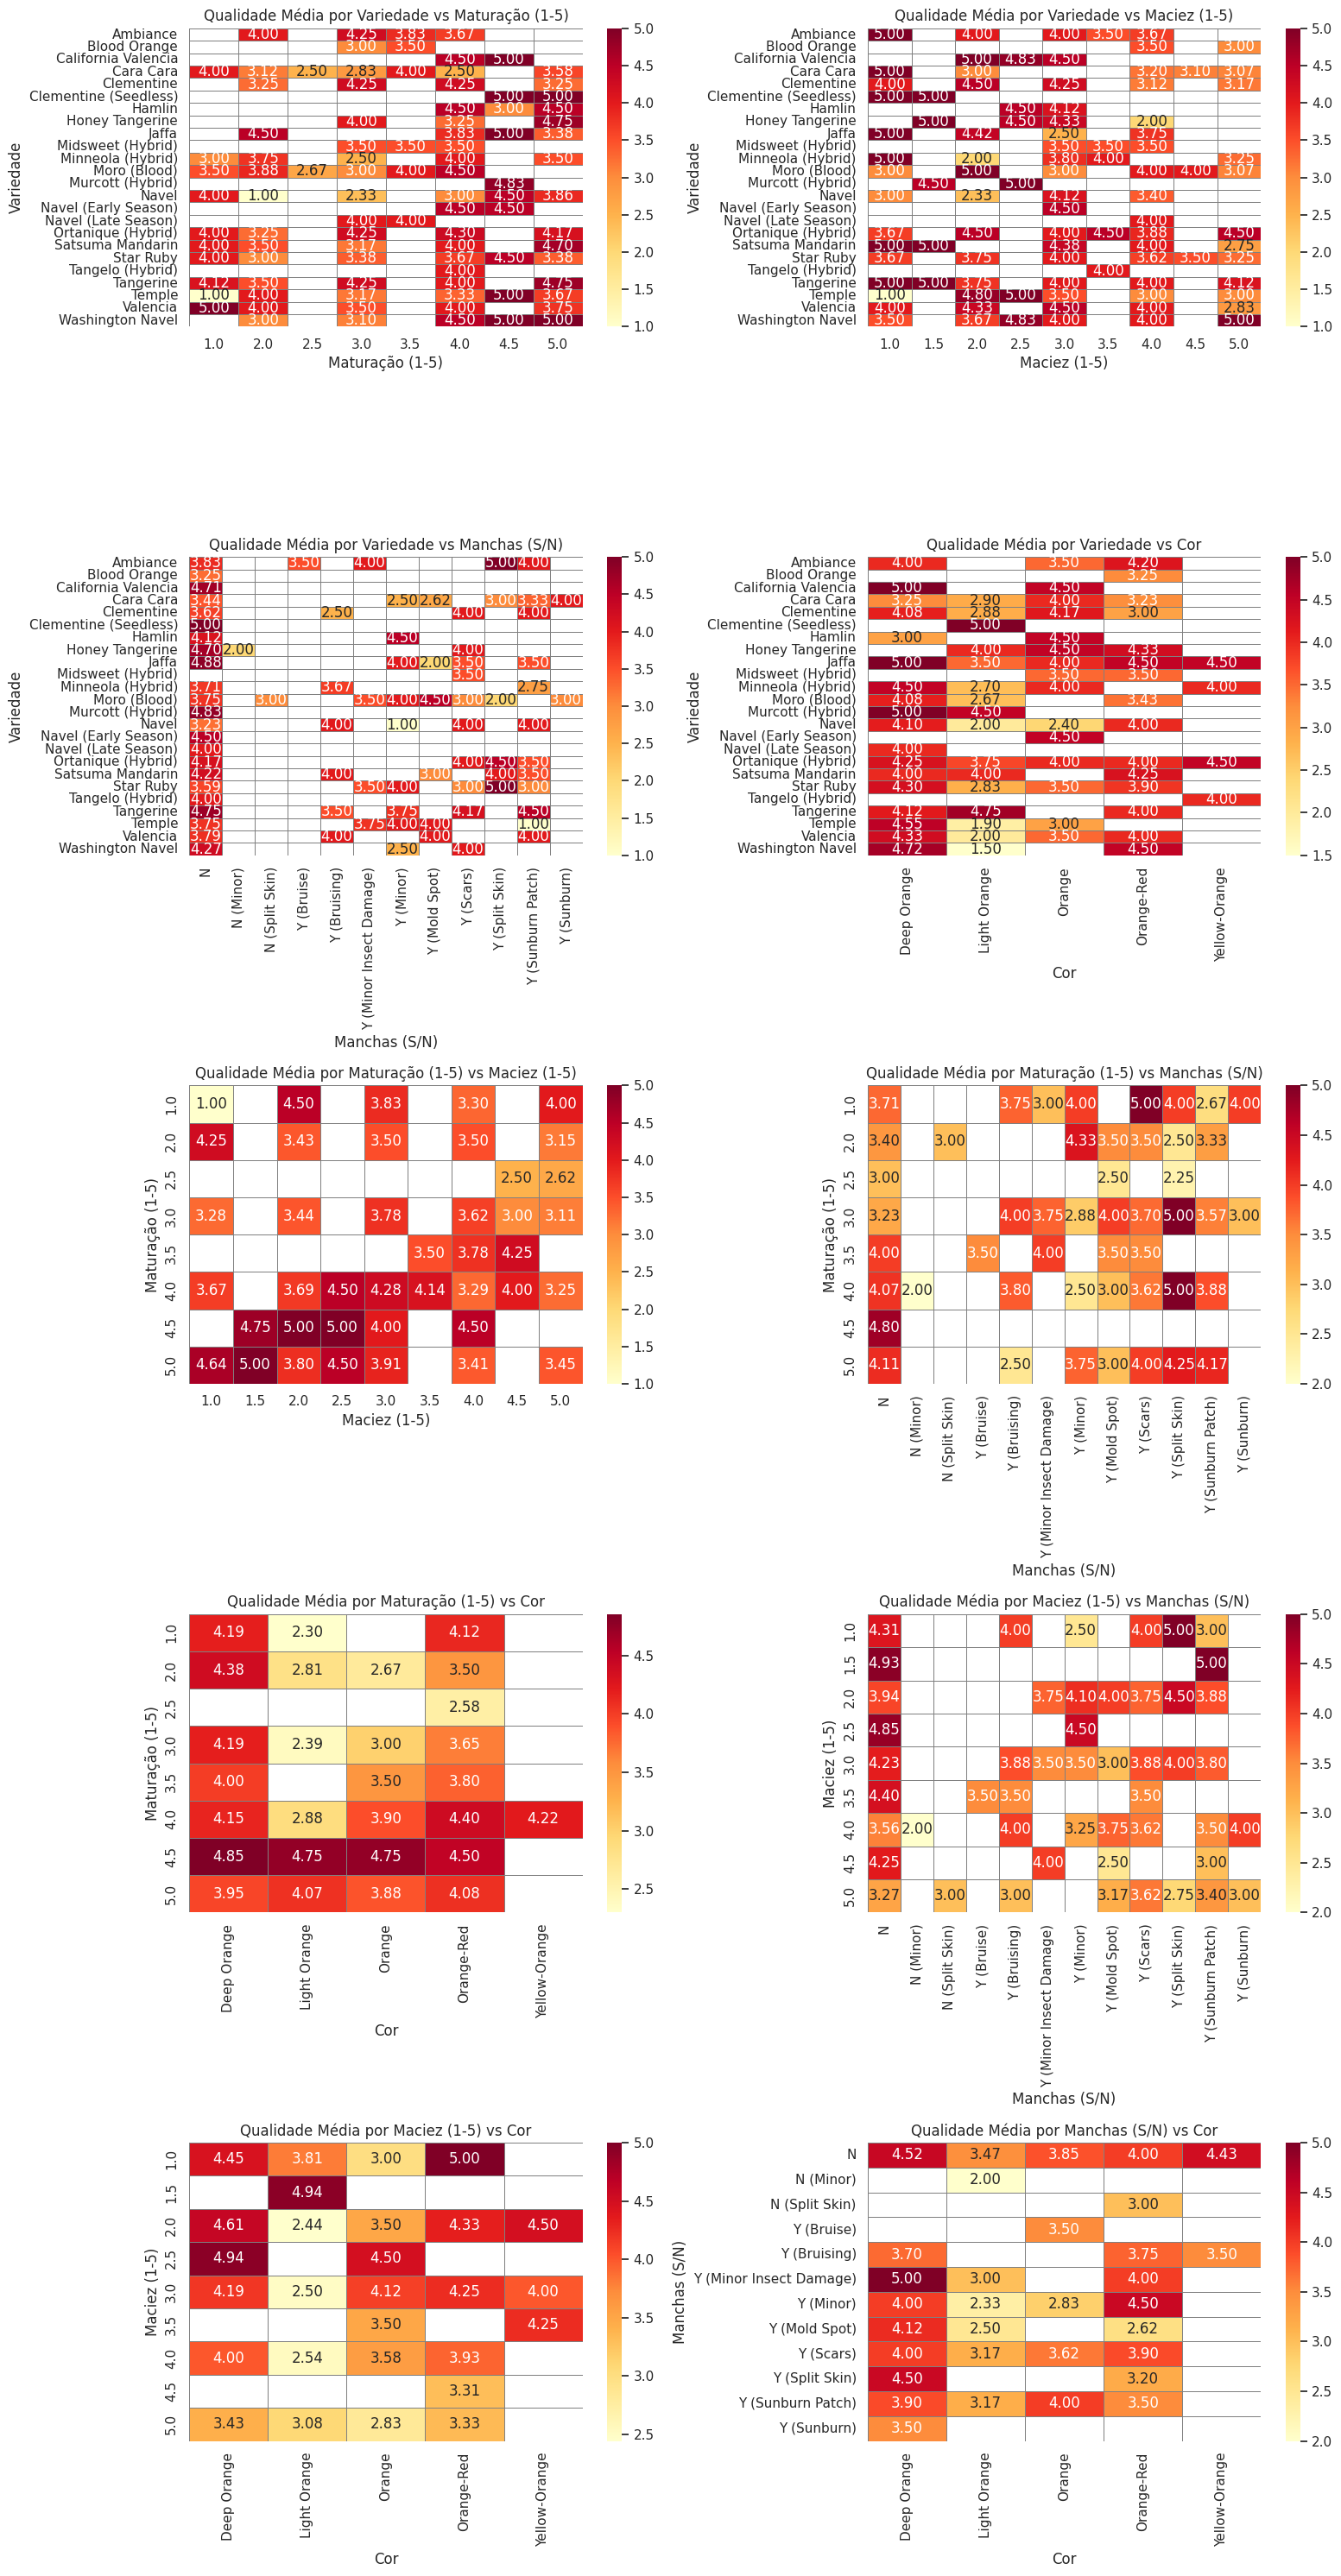

In [ ]:
# @title Heatmaps de Variáveis Qualitativas por Qualidade Média

qual_vars = ['Variedade', 'Maturação (1-5)', 'Maciez (1-5)', 'Manchas (S/N)', 'Cor']

combs = list(itertools.combinations(qual_vars, 2))

n_cols = 2
n_rows = (len(combs) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
axes = axes.flatten()

for i, (var1, var2) in enumerate(combs):
    pivot = df.pivot_table(index=var1, columns=var2, values='Qualidade (1-5)', aggfunc='mean')

    sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlOrRd', ax=axes[i], linewidths=0.5, linecolor='grey')
    axes[i].set_title(f'Qualidade Média por {var1} vs {var2}')
    axes[i].set_xlabel(var2)
    axes[i].set_ylabel(var1)

plt.tight_layout()
plt.show()

---
- Laranjas sem manchas (linha "N") têm as maiores notas de `qualidade`, especialmente as `Deep-Orange` (4.52) e `Yellow-Orange` (4.43).
- Algumas manchas podem ser “aceitas” dependendo da cor. Y (Minor Insect Damage) com `Deep-Orange` ainda tem `qualidade` 5.00, o mesmo tipo com `Light Orange` cai pra 3.00.
---


## Sumário Geral de Insights sobre Qualidade das Laranjas

### Cor e Variedade
- `Cor` igual a `Deep Orange` é a mais comum e associada à `Qualidade (1-5)` mais alta.
- `Variedade` igual a `Cara Cara` é a mais frequente.
- `Clementine Seedless`, `California Valencia` e `Navel (Late Season)` se destacam por `Qualidade (1-5)` consistentemente alta.

### Tamanho e Peso
- Frutas com `Tamanho (cm)` entre `6.5–8` e `Peso (g)` entre `100g–200g` tendem a ter:
  - `Brix (Doçura)` mais alto.
  - `pH (Acidez)` mais baixo.
  - `Qualidade (1-5)` mais alta.
- Frutas com `Tamanho (cm)` maior têm `pH (Acidez)` mais alto e `Brix (Doçura)` mais baixo.

### Tempo de Colheita
- `Tempo de Colheita (dias)` menor que `10` resulta em:
  - `Brix (Doçura)` mais alto.
  - `Qualidade (1-5)` mais alta.
- `Tempo de Colheita (dias)` mais longo:
  - Reduz `Brix (Doçura)`.
  - Aumenta `Peso (g)`, `pH (Acidez)` e `Maciez (1-5)`.

### Doçura e Acidez
- `Brix (Doçura)` tem alta correlação positiva com `Qualidade (1-5)`.
- `Brix (Doçura)` e `pH (Acidez)` são negativamente correlacionados.

### Maciez e Maturação
- Frutas com `Qualidade (1-5)` mais alta tendem a ter `Maciez (1-5)` mais baixa.
- A `Maturação (1-5)` apresenta correlação positiva com a `Qualidade (1-5)`, com um ponto ótimo em torno de 4.5.

### Manchas e Aparência
- Frutas com `Manchas (S/N)` igual a `N` ou com danos leves mantêm `Qualidade (1-5)` alta — especialmente quando a `Cor` é `Deep Orange` ou `Yellow-Orange`.

## Interações Visuais
- Certas `Manchas (S/N)` são aceitáveis dependendo da `Cor`:
  - `Dano leve` em `Deep Orange` → `Qualidade (1-5)` igual a `5`.
  - `Dano leve` em `Light Orange` → `Qualidade (1-5)` reduz para `3`.

### Perfil Ideal da Fruta de Alta Qualidade
- `Cor:` Deep Orange.
- `Tempo de Colheita (dias):` Precoce.
- `Brix (Doçura):` Maior que `10`.
- `pH (Acidez):` Entre `3.0–3.5`.
- `Maciez (1-5):` Baixa.
- `Manchas (S/N):` N.
